In [39]:
from pathlib import Path
import json
import tiktoken
import matplotlib.pyplot as plt

In [34]:
tokenizer = tiktoken.encoding_for_model('gpt-4o')

In [30]:
folder = Path("C:\\Timur\\Varios for job\\Data\\kotlin-test-based-bench")
log_file = folder / "claude_logs.jsonl"

with open(log_file, "r") as f:
    logs = f.read()
logs_split = logs[1:-1].split("}\n{")
logs = [json.loads("{" + (log.replace("\n", ""))+"}") for log in logs_split]

In [47]:
request_lengths = []
total_lengths = []
for log in logs:
    prompt_len = len(tokenizer.encode(log["promptMessage"]))
    response_len = len(tokenizer.encode(log["responseContent"]))
    request_lengths.append(prompt_len)
    total_lengths.append(prompt_len + response_len)

In [53]:
sum(total_lengths) - sum(request_lengths)

122091

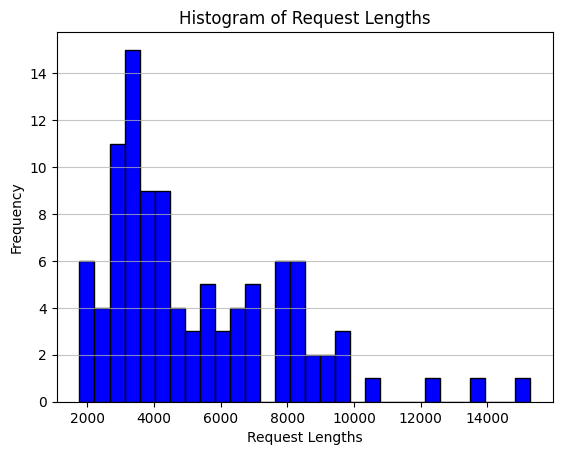

In [48]:
plt.hist(request_lengths, bins=30, color='blue', edgecolor='black')
plt.grid(axis='y', alpha=0.75)
plt.xlabel("Request Lengths")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.title("Histogram of Request Lengths")
plt.show()

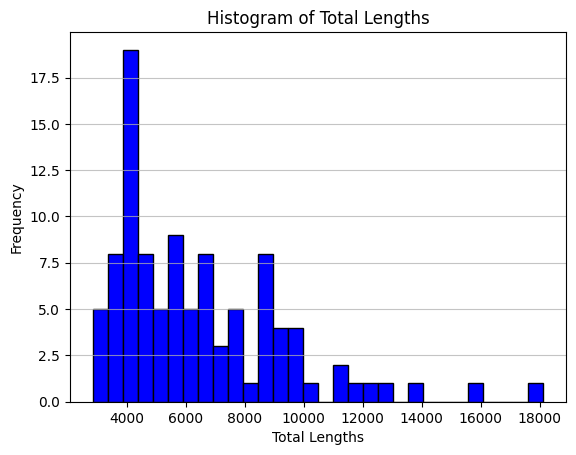

In [50]:
plt.hist(total_lengths, bins=30, color='blue', edgecolor='black')
plt.grid(axis='y', alpha=0.75)
plt.xlabel("Total Lengths")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.title("Histogram of Total Lengths")
plt.show()

In [55]:
with open("test.txt", "w") as f:
    f.write(logs[0]["promptMessage"])

In [56]:
with open("test.txt", "r") as f:
    qq = f.read()